## Ejercicio No1

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


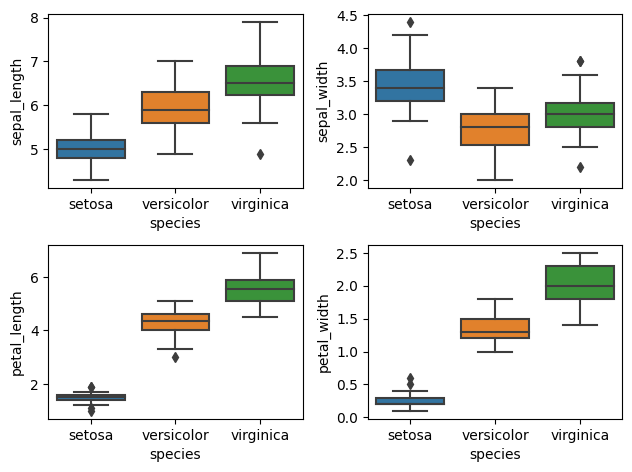

In [4]:
# Determinar que datos son los que mas se adecuan para analizar los datos
fig, axs = plt.subplots(2,2)
fn = ['sepal_length', 'sepal_width','petal_legth','petal_width']
cn = ['setosa','versicolor','virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data=data, order= cn, ax = axs[0,0])
sns.boxplot(x = 'species', y = 'sepal_width', data=data, order= cn, ax = axs[0,1])

sns.boxplot(x = 'species', y = 'petal_length', data=data, order= cn, ax = axs[1,0])
sns.boxplot(x = 'species', y = 'petal_width', data=data, order= cn, ax = axs[1,1])
fig.tight_layout(pad=1.0);

# Ancho de petalo 
# Longitud de petalo 
# longitud de sepalo

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
col_a_escalar = ['petal_length','petal_width','sepal_length']

In [8]:
datos_a_escalar = data[col_a_escalar]

In [9]:
datos_a_escalar

,petal_length,petal_width,sepal_length
0,1.4,0.2,5.1
1,1.4,0.2,4.9
2,1.3,0.2,4.7
3,1.5,0.2,4.6
4,1.4,0.2,5.0
...,...,...,...
145,5.2,2.3,6.7
146,5.0,1.9,6.3
147,5.2,2.0,6.5
148,5.4,2.3,6.2


In [10]:
datos_a_escalar = data.copy()

In [11]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(data[col_a_escalar])

In [14]:
datos_a_escalar.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,3.5,-1.340227,-1.315444,setosa
1,-1.143017,3.0,-1.340227,-1.315444,setosa
2,-1.385353,3.2,-1.397064,-1.315444,setosa
3,-1.506521,3.1,-1.283389,-1.315444,setosa
4,-1.021849,3.6,-1.340227,-1.315444,setosa
5,-0.537178,3.9,-1.169714,-1.052180,setosa
6,-1.506521,3.4,-1.340227,-1.183812,setosa
7,-1.021849,3.4,-1.283389,-1.315444,setosa
8,-1.748856,2.9,-1.340227,-1.315444,setosa
9,-1.143017,3.1,-1.283389,-1.447076,setosa


In [19]:
cluster_cols = ['petal_length','petal_width', 'sepal_length']
datos_a_escalar[cluster_cols].head()

,petal_length,petal_width,sepal_length
0,-1.340227,-1.315444,-0.900681
1,-1.340227,-1.315444,-1.143017
2,-1.397064,-1.315444,-1.385353
3,-1.283389,-1.315444,-1.506521
4,-1.340227,-1.315444,-1.021849


In [28]:
modelo2 = KMeans(n_clusters=4, random_state=42)
modelo2.fit(datos_a_escalar[cluster_cols])

c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [29]:
datos_a_escalar['Cluster'] = modelo.predict(datos_a_escalar[cluster_cols])
datos_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster3,Cluster
0,-0.900681,3.5,-1.340227,-1.315444,setosa,1,1
1,-1.143017,3.0,-1.340227,-1.315444,setosa,1,1
2,-1.385353,3.2,-1.397064,-1.315444,setosa,1,1
3,-1.506521,3.1,-1.283389,-1.315444,setosa,1,1
4,-1.021849,3.6,-1.340227,-1.315444,setosa,1,1
...,...,...,...,...,...,...,...
145,1.038005,3.0,0.819596,1.448832,virginica,0,0
146,0.553333,2.5,0.705921,0.922303,virginica,0,0
147,0.795669,3.0,0.819596,1.053935,virginica,0,0
148,0.432165,3.4,0.933271,1.448832,virginica,0,0


In [30]:
from sklearn import decomposition

In [31]:
pca = decomposition.PCA(n_components= 2)
pca_res = pca.fit_transform(datos_a_escalar[cluster_cols])

In [32]:
pca_res

array([[-2.06036006e+00, -2.98674403e-01],
       [-2.19598120e+00, -1.01727066e-01],
       [-2.36522102e+00,  8.07491332e-02],
       [-2.36579421e+00,  2.08165079e-01],
       [-2.12817063e+00, -2.00200734e-01],
       [-1.60325585e+00, -4.12703496e-01],
       [-2.32300467e+00,  2.62683189e-01],
       [-2.09455194e+00, -1.85729596e-01],
       [-2.53503403e+00,  3.90641278e-01],
       [-2.23877073e+00, -1.56245176e-01],
       [-1.82330967e+00, -5.79624270e-01],
       [-2.19655439e+00,  2.56888802e-02],
       [-2.34019999e+00, -7.22426457e-02],
       [-2.78010889e+00,  3.76712282e-01],
       [-1.65292347e+00, -1.01693236e+00],
       [-1.46706152e+00, -7.37066779e-01],
       [-1.73773060e+00, -4.70588050e-01],
       [-1.98395184e+00, -2.29685154e-01],
       [-1.47623237e+00, -7.77113751e-01],
       [-1.95033315e+00, -2.15214016e-01],
       [-1.75607230e+00, -5.50681993e-01],
       [-1.87392492e+00, -1.46224767e-01],
       [-2.53388765e+00,  1.35809386e-01],
       [-1.

In [33]:
datos_a_escalar['pc1'] = pca_res[:,0]
datos_a_escalar['pc2'] = pca_res[:,1]

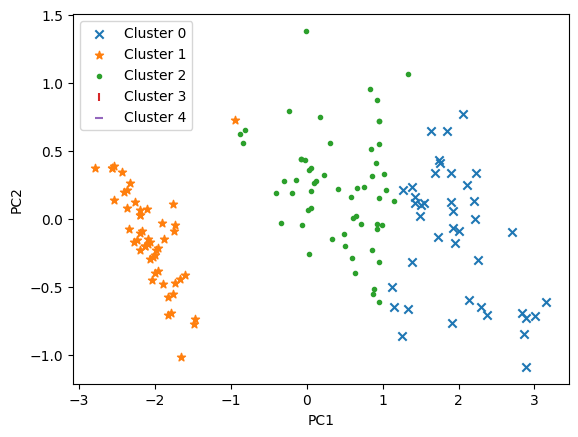

In [34]:
for species in range(5):
    temp = datos_a_escalar[datos_a_escalar.Cluster3==species]
    plt.scatter(temp.pc1, temp.pc2, marker=marcador[species],label = 'Cluster '+str(species))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [35]:
data['segmento IA'] = datos_a_escalar.Cluster
data

,sepal_length,sepal_width,petal_length,petal_width,species,segmento IA
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [37]:
data.groupby('segmento IA')[col_a_escalar].mean()

,petal_length,petal_width,sepal_length
segmento IA,,,
0,5.653659,2.036585,6.853659
1,1.498039,0.260784,5.003922
2,4.405172,1.432759,5.867241


In [38]:
col_segmento = ['petal_length','petal_width']
x = datos_a_escalar[col_segmento]

In [39]:
Plantas = data[['petal_length','petal_width','sepal_length']].copy()

In [41]:
km = KMeans(n_clusters=3, n_init=100, max_iter=1000, init='random')

In [42]:
prediccionkm = km.fit_predict(Plantas)

In [43]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [44]:
silhouette_score(Plantas,prediccionkm)

0.5848326611166372

In [45]:
calinski_harabasz_score(Plantas, prediccionkm)

684.292455197042

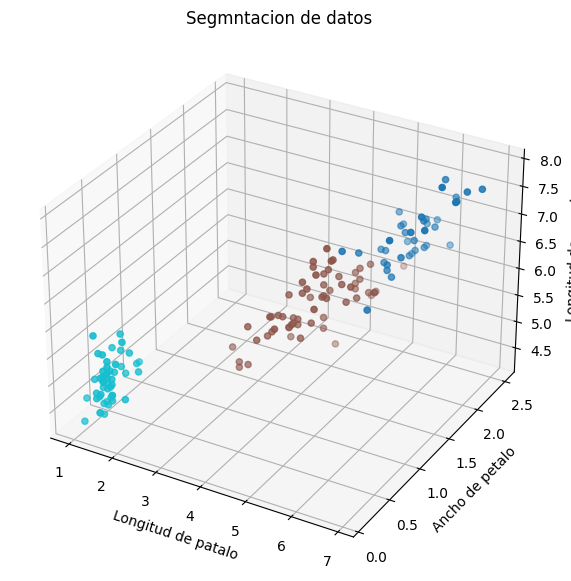

In [46]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter3D(Plantas['petal_length'],Plantas['petal_width'],Plantas['sepal_length'],c = prediccionkm, cmap = 'tab10')
plt.title('Segmntacion de datos')
ax.set_xlabel('Longitud de patalo')
ax.set_ylabel('Ancho de petalo')
ax.set_zlabel('Longitud de sepalo')
plt.show()